# Merge E, V into one object

## Set up correct conda environment


In [1]:
.libPaths('/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library')
.libPaths()

[1] "/home/groups/tttt/xjluo/miniconda3/envs/single_cell_Seurat_v5/lib/R/library"
[2] "/home/users/xjluo/miniconda3/envs/jupyter_env/lib/R/library"

## Load packages

In [2]:
library(tidyverse)
library(viridis)
library(Seurat)
library(Signac)
library(Azimuth)
library(EnsDb.Mmusculus.v79)
library(BSgenome.Mmusculus.UCSC.mm10)
library(ggpointdensity)
library(ggExtra)

set.seed(1234)
options(repr.matrix.max.cols=100, repr.matrix.max.rows=50)
options(warn=-1)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: viridisLite

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



Attaching shinyBS

Loading required package: ensembldb

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following ob

In [3]:
sessionInfo()

R version 4.3.3 (2024-02-29)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/users/xjluo/miniconda3/envs/jupyter_env/lib/libopenblasp-r0.3.21.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: America/Los_Angeles
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggExtra_0.10.1                     ggpointdensity_0.1.0              
 [3] BSgenome.Mmusculus.UCSC.mm10_1.4.3 BSgenome_1.68.0                   
 [5] rtracklayer_1.60.1                 Bi

In [4]:
sample1 <- 'E1_V1'
sample2 <- 'E2_V2'

## STEP 0: Paths

In [5]:
data_master_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC'

data_master_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC"

In [6]:
# E1
E1.path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/', 'E1', ".ATAC.filtered.Seurat.v5.rds")

E1.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/E1.ATAC.filtered.Seurat.v5.rds"

In [7]:
# E2
E2.path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/', 'E2', ".ATAC.filtered.Seurat.v5.rds")

E2.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/E2.ATAC.filtered.Seurat.v5.rds"

In [8]:
# V1
V1.path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/', 'V1', ".ATAC.filtered.Seurat.v5.rds")

V1.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/V1.ATAC.filtered.Seurat.v5.rds"

In [9]:
# V2
V2.path <- paste0(data_master_dir, '/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/', 'V2', ".ATAC.filtered.Seurat.v5.rds")

V2.path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/2_filtered_objects/V2.ATAC.filtered.Seurat.v5.rds"

In [10]:
# peaks
macs3_output_dir <- '/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs'

macs3_output_dir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs"

In [11]:
merge_savedir <- paste0(data_master_dir, '/xjluo_analysis/step2_merge')

merge_savedir

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge"

## STEP 1: Load objects

In [12]:
E1.atac.obj <- readRDS(E1.path)
E2.atac.obj <- readRDS(E2.path)

In [13]:
V1.atac.obj <- readRDS(V1.path)
V2.atac.obj <- readRDS(V2.path)

In [14]:
E1.atac.obj

An object of class Seurat 
299905 features across 2663 samples within 1 assay 
Active assay: ATAC (299905 features, 299905 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [15]:
E2.atac.obj

An object of class Seurat 
346288 features across 2328 samples within 1 assay 
Active assay: ATAC (346288 features, 346288 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [16]:
V1.atac.obj

An object of class Seurat 
290852 features across 2245 samples within 1 assay 
Active assay: ATAC (290852 features, 290852 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [17]:
V2.atac.obj

An object of class Seurat 
300695 features across 1768 samples within 1 assay 
Active assay: ATAC (300695 features, 300695 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

### STEP 1.1 Check object contents

In [18]:
head(E1.atac.obj@meta.data)
dim(E1.atac.obj@meta.data)
colnames(E1.atac.obj@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
AAACGAAAGCATTCCA-1,SeuratProject,13549,11065,0.3367067,0.45,4.084740,0.43,6,6
AAACGAACAACGACAG-1,SeuratProject,12245,9566,0.2950055,0.12,4.882617,0.72,0,0
AAACGAACACAGCTTA-1,SeuratProject,11417,9194,0.3963964,0.82,3.790065,0.29,3,3
AAACGAAGTACCTATG-1,SeuratProject,11572,9480,0.3303844,0.38,4.986318,0.75,0,0
AAACGAATCCGTGCAG-1,SeuratProject,14952,11895,0.3274232,0.36,4.944932,0.74,0,0
AAACGAATCGGAGTTT-1,SeuratProject,13051,10743,0.3336425,0.42,3.742822,0.27,3,3


[1] 2663    9

[1] "orig.ident"            "nCount_ATAC"           "nFeature_ATAC"        
[4] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
[7] "TSS.percentile"        "ATAC_snn_res.1.2"      "seurat_clusters"

In [19]:
head(E2.atac.obj@meta.data)
dim(E2.atac.obj@meta.data)
colnames(E2.atac.obj@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters,highlight
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>
AAACGAACACCGTTGG-1,SeuratProject,35748,24470,0.4466046,0.12,3.976600,0.59,2,2,Other Clusters
AAACGAACATCCGTAA-1,SeuratProject,27220,20777,0.7974407,0.97,3.753556,0.47,9,9,Other Clusters
AAACGAAGTCACAGGA-1,SeuratProject,28083,19766,0.4763083,0.26,4.128004,0.65,0,0,Other Clusters
AAACGAAGTCTGGGAA-1,SeuratProject,28500,19200,0.4561156,0.16,3.721539,0.45,0,0,Other Clusters
AAACGAAGTTTGCATG-1,SeuratProject,21590,15461,0.5101010,0.46,4.279949,0.70,4,4,Other Clusters
AAACTCGAGATTCCGT-1,SeuratProject,38904,26669,0.5183345,0.51,3.986654,0.59,3,3,Other Clusters


[1] 2328   10

[1] "orig.ident"            "nCount_ATAC"           "nFeature_ATAC"        
 [4] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
 [7] "TSS.percentile"        "ATAC_snn_res.1.2"      "seurat_clusters"      
[10] "highlight"

In [20]:
head(V1.atac.obj@meta.data)
dim(V1.atac.obj@meta.data)
colnames(V1.atac.obj@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
AAACGAAGTGAGCTAG-1,SeuratProject,18744,13758,0.3832275,0.21,4.371193,0.54,0,0
AAACGAATCAGTGTAC-1,SeuratProject,18574,13257,0.4098734,0.42,4.305898,0.52,4,4
AAACGAATCCATCATT-1,SeuratProject,15360,11801,0.4188426,0.48,5.139874,0.80,2,2
AAACGAATCTGGAAGG-1,SeuratProject,19595,15796,0.6104651,0.96,3.788003,0.27,0,0
AAACTCGAGAGATTAC-1,SeuratProject,16994,12573,0.4954092,0.82,4.077077,0.41,7,7
AAACTCGAGGCGTCCT-1,SeuratProject,23242,16284,0.3660436,0.12,3.901688,0.33,4,4


[1] 2245    9

[1] "orig.ident"            "nCount_ATAC"           "nFeature_ATAC"        
[4] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
[7] "TSS.percentile"        "ATAC_snn_res.1.2"      "seurat_clusters"

In [21]:
head(V2.atac.obj@meta.data)
dim(V2.atac.obj@meta.data)
colnames(V2.atac.obj@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters
,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
AAACGAAGTAACCGAG-1,SeuratProject,20235,14510,0.3740346,0.04,4.586481,0.69,0,0
AAACGAAGTGCAGACA-1,SeuratProject,20748,15103,0.6219129,0.92,3.982225,0.43,7,7
AAACTCGAGAGAATTC-1,SeuratProject,18260,13329,0.4359325,0.31,4.714613,0.73,2,2
AAACTCGCAATTGCCA-1,SeuratProject,18450,13448,0.3670155,0.04,4.874962,0.77,2,2
AAACTCGCATCTGCAA-1,SeuratProject,18909,13561,0.4255628,0.24,4.309062,0.59,0,0
AAACTCGGTAGATTAG-1,SeuratProject,29066,20733,0.5208286,0.75,3.105628,0.06,1,1


[1] 1768    9

[1] "orig.ident"            "nCount_ATAC"           "nFeature_ATAC"        
[4] "nucleosome_signal"     "nucleosome_percentile" "TSS.enrichment"       
[7] "TSS.percentile"        "ATAC_snn_res.1.2"      "seurat_clusters"

In [22]:
dim(GetAssayData(E1.atac.obj, assay = 'ATAC', slot = 'data'))
dim(GetAssayData(E2.atac.obj, assay = 'ATAC', slot = 'data'))

[1] 299905   2663

[1] 346288   2328

In [23]:
dim(GetAssayData(V1.atac.obj, assay = 'ATAC', slot = 'data'))
dim(GetAssayData(V2.atac.obj, assay = 'ATAC', slot = 'data'))

[1] 290852   2245

[1] 300695   1768

### Plots

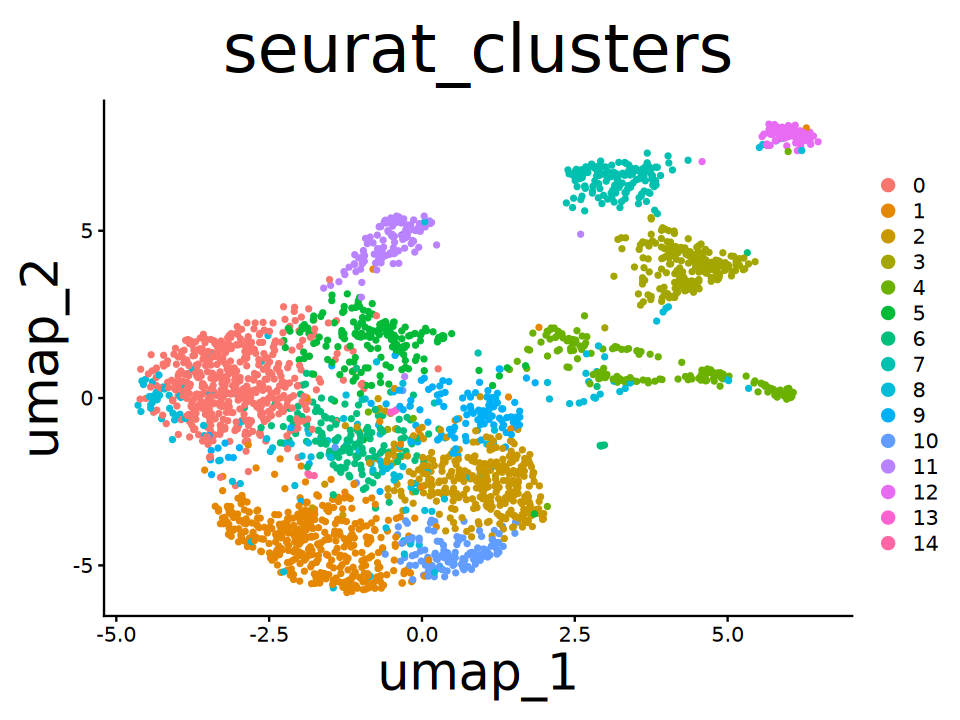

In [24]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(E1.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'seurat_clusters', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

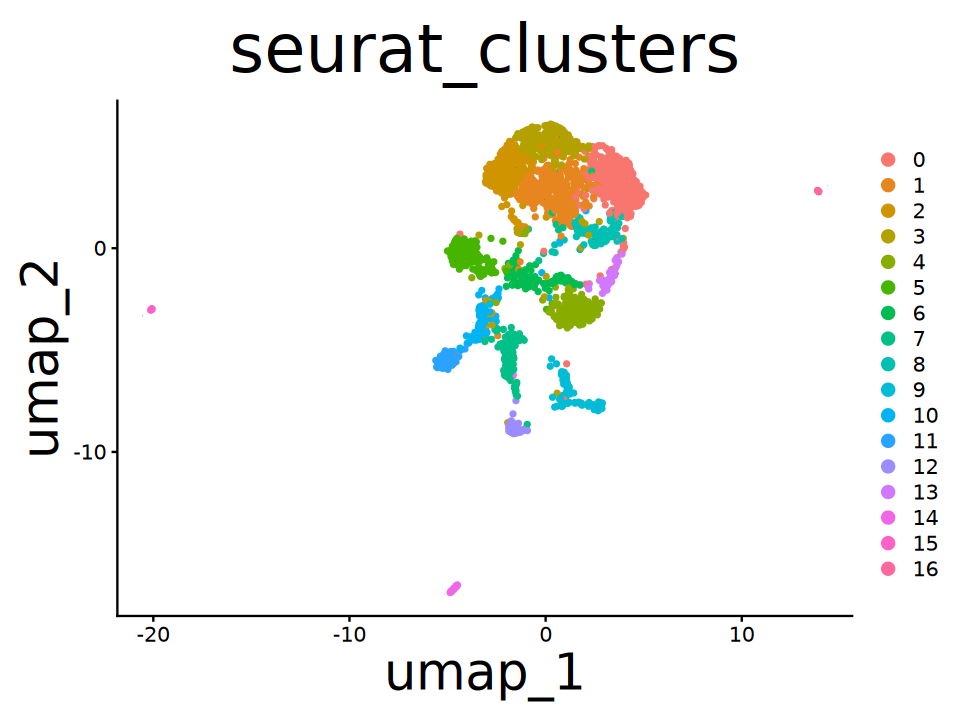

In [25]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(E2.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'seurat_clusters', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

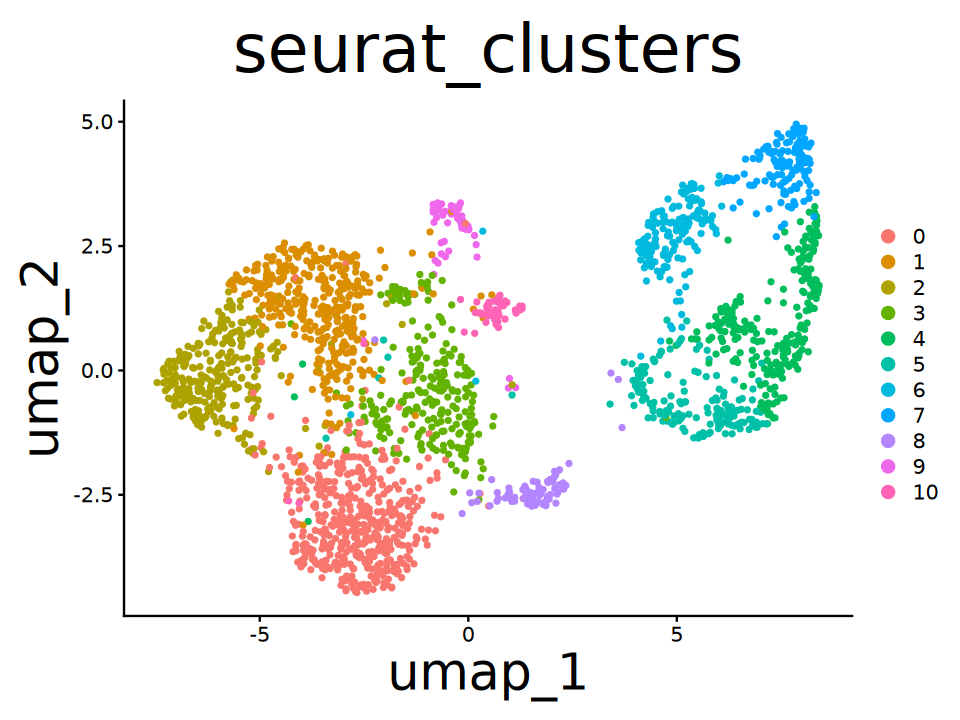

In [26]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(V1.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'seurat_clusters', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

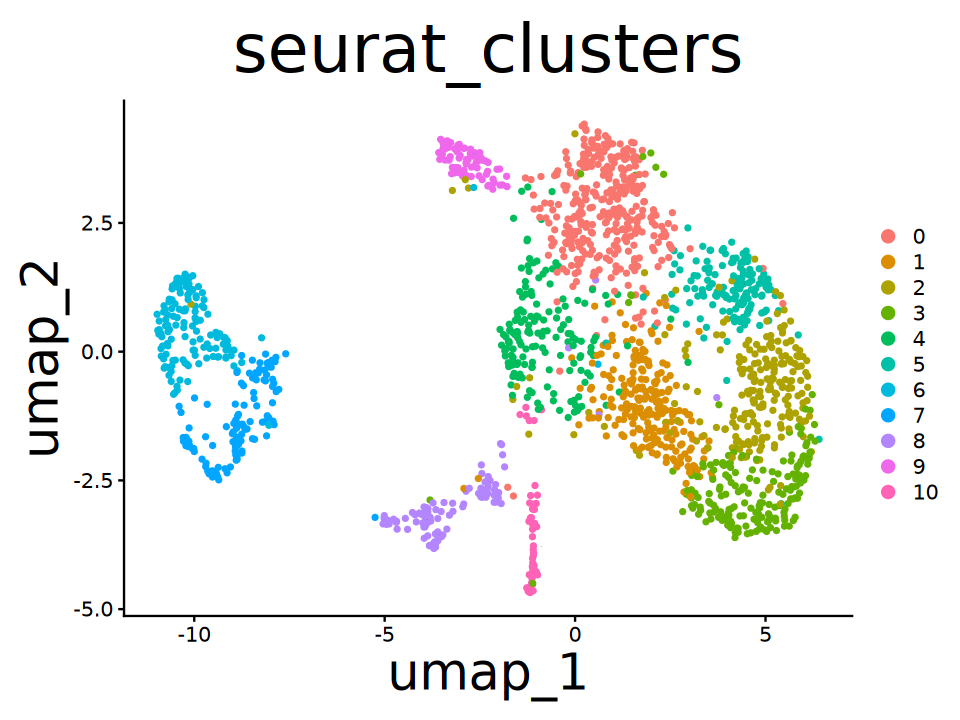

In [27]:
options(repr.plot.width=8, repr.plot.height=6)

DimPlot(V2.atac.obj, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'seurat_clusters', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

In [28]:
head(Cells(E1.atac.obj))
tail(Cells(E1.atac.obj))
     

head(Cells(E2.atac.obj))
tail(Cells(E2.atac.obj))

[1] "AAACGAAAGCATTCCA-1" "AAACGAACAACGACAG-1" "AAACGAACACAGCTTA-1"
[4] "AAACGAAGTACCTATG-1" "AAACGAATCCGTGCAG-1" "AAACGAATCGGAGTTT-1"

[1] "TTTGGTTAGGAATGGA-1" "TTTGGTTGTACGTAAA-1" "TTTGGTTTCCCGAAGC-1"
[4] "TTTGTGTAGACTCGGA-1" "TTTGTGTAGGAACCGT-1" "TTTGTGTGTCTGGTTA-1"

[1] "AAACGAACACCGTTGG-1" "AAACGAACATCCGTAA-1" "AAACGAAGTCACAGGA-1"
[4] "AAACGAAGTCTGGGAA-1" "AAACGAAGTTTGCATG-1" "AAACTCGAGATTCCGT-1"

[1] "TTTGGTTCATGCCCTT-1" "TTTGGTTGTATTCACG-1" "TTTGGTTTCAAAGTAG-1"
[4] "TTTGTGTAGTCGTGAG-1" "TTTGTGTGTATGAAGT-1" "TTTGTGTGTCAGAGTG-1"

In [29]:
head(Cells(V1.atac.obj))
tail(Cells(V1.atac.obj))
  

head(Cells(V2.atac.obj))
tail(Cells(V2.atac.obj))

[1] "AAACGAAGTGAGCTAG-1" "AAACGAATCAGTGTAC-1" "AAACGAATCCATCATT-1"
[4] "AAACGAATCTGGAAGG-1" "AAACTCGAGAGATTAC-1" "AAACTCGAGGCGTCCT-1"

[1] "TTTGTGTAGAATAGTC-1" "TTTGTGTAGGTGTCGA-1" "TTTGTGTCAGAGCCAA-1"
[4] "TTTGTGTGTAAGTGCG-1" "TTTGTGTGTATCATGC-1" "TTTGTGTTCTCTGTTA-1"

[1] "AAACGAAGTAACCGAG-1" "AAACGAAGTGCAGACA-1" "AAACTCGAGAGAATTC-1"
[4] "AAACTCGCAATTGCCA-1" "AAACTCGCATCTGCAA-1" "AAACTCGGTAGATTAG-1"

[1] "TTTGGTTCACTGTCGG-1" "TTTGGTTCAGGGCTTC-1" "TTTGGTTTCTTACTCA-1"
[4] "TTTGTGTAGCGTTAGG-1" "TTTGTGTAGTCAGGAC-1" "TTTGTGTGTTTCTTAC-1"

## STEP 2: Combine E and V into one object

In [30]:
library(future)

plan("multicore", workers = 4)
options(future.globals.maxSize = 50000 * 2 * 1024^2) # for 50 Gb RAM


Attaching package: 'future'


The following object is masked from 'package:AnnotationFilter':

    value




### Step 2.1: get combined peak set

In [31]:
e1_peaks <- paste0(macs3_output_dir, '/', 'E1', '/SeuratProject_peaks.narrowPeak')
e2_peaks <- paste0(macs3_output_dir, '/', 'E2', '/SeuratProject_peaks.narrowPeak')

v1_peaks <- paste0(macs3_output_dir, '/', 'V1', '/SeuratProject_peaks.narrowPeak')
v2_peaks <- paste0(macs3_output_dir, '/', 'V2', '/SeuratProject_peaks.narrowPeak')


e1_peaks
e2_peaks
v1_peaks
v2_peaks

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs/E1/SeuratProject_peaks.narrowPeak"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs/E2/SeuratProject_peaks.narrowPeak"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs/V1/SeuratProject_peaks.narrowPeak"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step1_qc/ATAC/macs3_outputs/V2/SeuratProject_peaks.narrowPeak"

In [32]:
# read in peak sets
peaks.e1 <- read.table(
  file = e1_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)

peaks.e2 <- read.table(
  file = e2_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)


peaks.v1 <- read.table(
  file = v1_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)

peaks.v2 <- read.table(
  file = v2_peaks,
  col.names = c("chr", "start", "end", "name",
                "score", "strand", "fold_change",
                "neg_log10pvalue_summit", "neg_log10qvalue_summit",
                "relative_summit_position")
)


# convert to genomic ranges
gr.e1 <- makeGRangesFromDataFrame(peaks.e1, starts.in.df.are.0based=TRUE)
gr.e2 <- makeGRangesFromDataFrame(peaks.e2, starts.in.df.are.0based=TRUE)
gr.v1 <- makeGRangesFromDataFrame(peaks.v1, starts.in.df.are.0based=TRUE)
gr.v2 <- makeGRangesFromDataFrame(peaks.v2, starts.in.df.are.0based=TRUE)


# Create a unified set of peaks to quantify in each dataset
# https://stuartlab.org/signac/articles/merging
combined.peaks <- reduce(x = c(gr.e1, gr.e2, gr.v1, gr.v2))

# Filter out bad peaks based on length
peakwidths <- width(combined.peaks)
combined.peaks <- combined.peaks[peakwidths < 1500 & peakwidths > 25]


# remove peaks on nonstandard chromosomes and in genomic blacklist regions
combined.peaks <- keepStandardChromosomes(combined.peaks, pruning.mode = "coarse")
combined.peaks <- subsetByOverlaps(x = combined.peaks, ranges=blacklist_mm10, invert=TRUE)

combined.peaks

GRanges object with 385824 ranges and 0 metadata columns:
           seqnames              ranges strand
              <Rle>           <IRanges>  <Rle>
       [1]     chr1     3094938-3095260      *
       [2]     chr1     3113057-3113958      *
       [3]     chr1     3114013-3114245      *
       [4]     chr1     3118855-3119029      *
       [5]     chr1     3119037-3119445      *
       ...      ...                 ...    ...
  [385820]     chrX 169880958-169881120      *
  [385821]     chrX 169883419-169883677      *
  [385822]     chrX 169923464-169923616      *
  [385823]     chrX 169927083-169927609      *
  [385824]     chrX 169946380-169946630      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

### Step 2.2: create fragments objects

In [33]:
# Data
frag_file.e1 <- paste0(data_master_dir, '/', 'outs/', 'E1', '_outs_trimmed/', 'fragments.tsv.gz')
frag_file.e2 <- paste0(data_master_dir, '/', 'outs/', 'E2', '_outs_trimmed/', 'fragments.tsv.gz')

frag_file.v1 <- paste0(data_master_dir, '/', 'outs/', 'V1', '_outs_trimmed/', 'fragments.tsv.gz')
frag_file.v2 <- paste0(data_master_dir, '/', 'outs/', 'V2', '_outs_trimmed/', 'fragments.tsv.gz')


frag_file.e1
frag_file.e2
frag_file.v1
frag_file.v2

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/outs/E1_outs_trimmed/fragments.tsv.gz"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/outs/E2_outs_trimmed/fragments.tsv.gz"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/outs/V1_outs_trimmed/fragments.tsv.gz"

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/outs/V2_outs_trimmed/fragments.tsv.gz"

In [34]:
# create fragment objects

frags.e1 <- CreateFragmentObject(
  path = frag_file.e1,
  cells = Cells(E1.atac.obj)
)

frags.e2 <- CreateFragmentObject(
  path = frag_file.e2,
  cells = Cells(E2.atac.obj)
)


frags.e1
frags.e2

Computing hash

Computing hash



A Fragment object for 2663 cells

A Fragment object for 2328 cells

In [35]:
frags.v1 <- CreateFragmentObject(
  path = frag_file.v1,
  cells = Cells(V1.atac.obj)
)

frags.v2 <- CreateFragmentObject(
  path = frag_file.v2,
  cells = Cells(V2.atac.obj)
)

frags.v1
frags.v2

Computing hash

Computing hash



A Fragment object for 2245 cells

A Fragment object for 1768 cells

## Step 3: get FeatureMatrix using consensus peak set

In [36]:
e1.counts <- FeatureMatrix(
  fragments = frags.e1,
  features = combined.peaks,
  cells = Cells(E1.atac.obj)
)

e2.counts <- FeatureMatrix(
  fragments = frags.e2,
  features = combined.peaks,
  cells = Cells(E2.atac.obj)
)


v1.counts <- FeatureMatrix(
  fragments = frags.v1,
  features = combined.peaks,
  cells = Cells(V1.atac.obj)
)

v2.counts <- FeatureMatrix(
  fragments = frags.v2,
  features = combined.peaks,
  cells = Cells(V2.atac.obj)
)

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions

Extracting reads overlapping genomic regions



## Step 4: Create Seurat objects per dataset (E, V)

In [37]:
e1_assay <- CreateChromatinAssay(e1.counts, fragments = frags.e1)
e1.obj.consensus <- CreateSeuratObject(e1_assay, assay = "ATAC", meta.data=E1.atac.obj@meta.data)

e2_assay <- CreateChromatinAssay(e2.counts, fragments = frags.e2)
e2.obj.consensus <- CreateSeuratObject(e2_assay, assay = "ATAC", meta.data=E2.atac.obj@meta.data)


v1_assay <- CreateChromatinAssay(v1.counts, fragments = frags.v1)
v1.obj.consensus <- CreateSeuratObject(v1_assay, assay = "ATAC", meta.data=V1.atac.obj@meta.data)

v2_assay <- CreateChromatinAssay(v2.counts, fragments = frags.v2)
v2.obj.consensus <- CreateSeuratObject(v2_assay, assay = "ATAC", meta.data=V2.atac.obj@meta.data)

## Step 5: Merge objects

In [38]:
# add information to identify dataset of origin
e1.obj.consensus$dataset <- 'e1'
e2.obj.consensus$dataset <- 'e2'

v1.obj.consensus$dataset <- 'v1'
v2.obj.consensus$dataset <- 'v2'


# merge all datasets, adding a cell ID to make sure cell names are unique
all.combined <- merge(
  x = e1.obj.consensus,
  y = list(e2.obj.consensus, v1.obj.consensus, v2.obj.consensus),
  add.cell.ids = c("e1", "e2", "v1", "v2")
)

all.combined[["ATAC"]]

ChromatinAssay data with 385824 features for 9004 cells
Variable features: 0 
Genome: 
Annotation present: FALSE 
Motifs present: FALSE 
Fragment files: 4 

## Step 6: check merged object

In [39]:
all.combined <- RunTFIDF(all.combined)
all.combined <- FindTopFeatures(all.combined, min.cutoff = 20)
all.combined <- RunSVD(all.combined)
all.combined <- RunUMAP(all.combined, dims = 2:50, reduction = 'lsi')

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

13:54:55 UMAP embedding parameters a = 0.9922 b = 1.112

13:54:55 Read 9004 rows and found 49 numeric columns

13:54:55 Using Annoy for neighbor search, n_neighbors = 30

13:54:55 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:54:55 Writing NN index file to temp file /tmp/RtmpHGOdET/file1770b5087960b

13:54:55 Searching Annoy index using 4 threads, search_k = 3000

13:54:56 Annoy recall = 100%

13:54:58 Commencing smooth kNN distance calibration using 4 threads
 with target n_neighbors = 30

13:55:00 Initializing from normalized Laplacian + noise (using RSpectra)

13:55:01 Commencing optimization for 500 epochs, with 383728 positive edges

13:55:29 Optimization finished



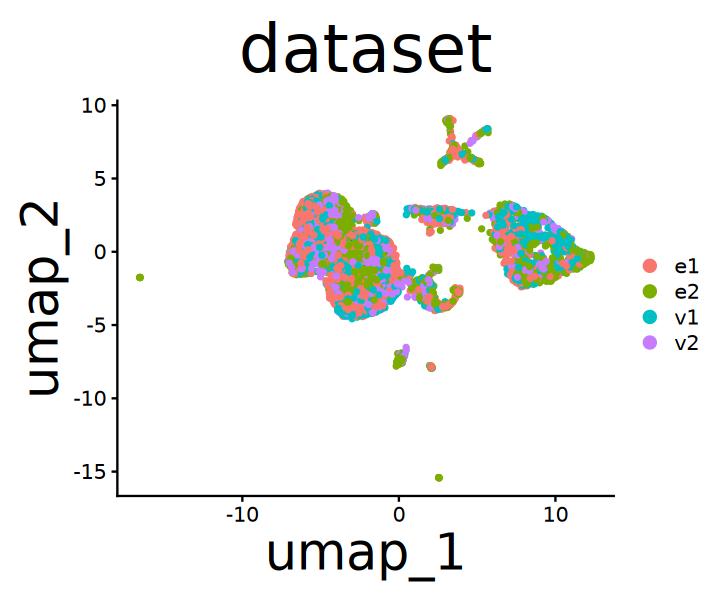

In [40]:
options(repr.plot.width=6, repr.plot.height=5)

DimPlot(all.combined, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

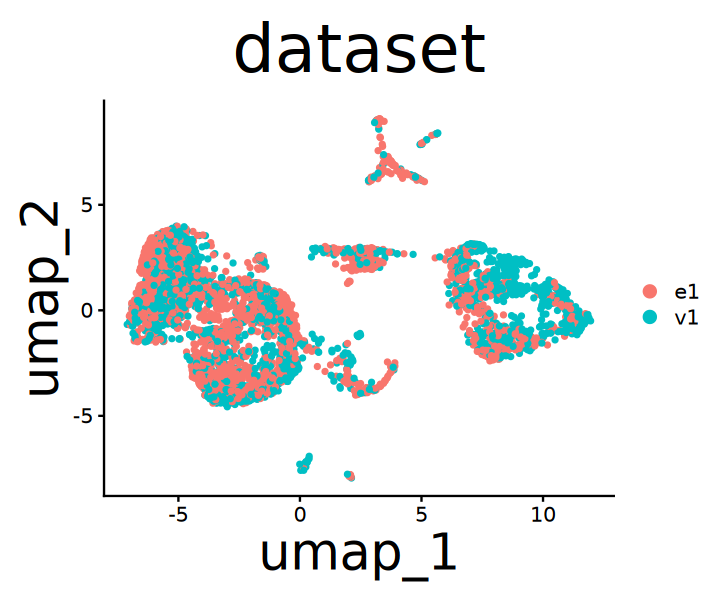

In [41]:
options(repr.plot.width=6, repr.plot.height=5)

Idents(all.combined) <- 'dataset'
sub_e1v1 <- subset(x = all.combined, idents = c('e1', 'v1'))
DimPlot(sub_e1v1, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

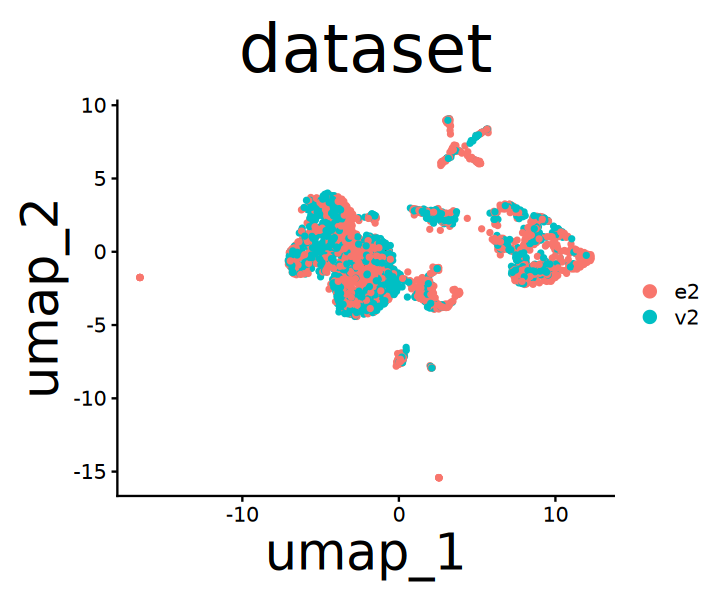

In [42]:
options(repr.plot.width=6, repr.plot.height=5)

Idents(all.combined) <- 'dataset'
sub_e2v2 <- subset(x = all.combined, idents = c('e2', 'v2'))
DimPlot(sub_e2v2, shuffle=TRUE, label = TRUE, repel = TRUE, pt.siz=1, label.size=0, group.by = 'dataset', raster=FALSE) + theme(plot.title = element_text(size=40),
                                                                                                                                         axis.title = element_text(size=30)
                                                                                                                                        )
     

     
     
     

In [43]:
head(Cells(all.combined))
tail(Cells(all.combined))

[1] "e1_AAACGAAAGCATTCCA-1" "e1_AAACGAACAACGACAG-1" "e1_AAACGAACACAGCTTA-1"
[4] "e1_AAACGAAGTACCTATG-1" "e1_AAACGAATCCGTGCAG-1" "e1_AAACGAATCGGAGTTT-1"

[1] "v2_TTTGGTTCACTGTCGG-1" "v2_TTTGGTTCAGGGCTTC-1" "v2_TTTGGTTTCTTACTCA-1"
[4] "v2_TTTGTGTAGCGTTAGG-1" "v2_TTTGTGTAGTCAGGAC-1" "v2_TTTGTGTGTTTCTTAC-1"

In [44]:
head(all.combined@meta.data)
dim(all.combined@meta.data)

,orig.ident,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,ATAC_snn_res.1.2,seurat_clusters,dataset,highlight
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
e1_AAACGAAAGCATTCCA-1,SeuratProject,7037,6504,0.3367067,0.45,4.084740,0.43,6,6,e1,NA
e1_AAACGAACAACGACAG-1,SeuratProject,5517,4877,0.2950055,0.12,4.882617,0.72,0,0,e1,NA
e1_AAACGAACACAGCTTA-1,SeuratProject,5922,5394,0.3963964,0.82,3.790065,0.29,3,3,e1,NA
e1_AAACGAAGTACCTATG-1,SeuratProject,5461,5019,0.3303844,0.38,4.986318,0.75,0,0,e1,NA
e1_AAACGAATCCGTGCAG-1,SeuratProject,6716,6288,0.3274232,0.36,4.944932,0.74,0,0,e1,NA
e1_AAACGAATCGGAGTTT-1,SeuratProject,6665,6235,0.3336425,0.42,3.742822,0.27,3,3,e1,NA


[1] 9004   11

## STEP 7: Save merged object

In [45]:
all.combined

An object of class Seurat 
385824 features across 9004 samples within 1 assay 
Active assay: ATAC (385824 features, 385824 variable features)
 2 layers present: counts, data
 2 dimensional reductions calculated: lsi, umap

In [46]:
Version(all.combined)

[1] '5.0.2'

In [47]:
save_path <- paste0(merge_savedir, '/E_V/', sample1, '_', sample2, '_', 'merged.rds')

save_path

[1] "/oak/stanford/groups/tttt/collaboration/jin/240821_ATAC/xjluo_analysis/step2_merge/E_V/E1_V1_E2_V2_merged.rds"

In [48]:
saveRDS(all.combined, file = save_path)

print('Done')

[1] "Done"


# END